In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('./crimes_against_women_2001-2014.csv')
df.head()

,sr_no,state/ut,district,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [59]:
df.shape

(10186, 11)

In [60]:
df.describe()

,sr_no,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
count,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000,10186.000000
mean,3870.217357,2007.706853,30.392598,36.628608,10.577263,59.506087,14.370509,109.654820,0.091891
std,2817.921207,4.047104,34.421687,53.621047,14.305337,77.529300,44.299678,193.378706,1.323404
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1004.250000,2004.000000,8.000000,6.000000,1.000000,10.000000,0.000000,11.000000,0.000000
50%,3680.500000,2008.000000,21.000000,19.000000,5.000000,32.000000,1.000000,49.000000,0.000000
75%,6348.750000,2011.000000,42.000000,46.000000,15.000000,79.000000,11.000000,134.000000,0.000000
max,9015.000000,2014.000000,607.000000,688.000000,178.000000,1626.000000,1257.000000,3504.000000,60.000000


In [61]:
df.columns

Index(['sr_no', 'state/ut', 'district', 'year', 'rape',
       'kidnapping_and_abduction', 'dowry_deaths', 'assault_on_women',
       'insult_to_modesty', 'cruelty_by_husband_or_relatives',
       'importation_of_girls'],
      dtype='object')

In [62]:
df.nunique()

sr_no                              8635
state/ut                             37
district                            897
year                                 14
rape                                227
kidnapping_and_abduction            338
dowry_deaths                        101
assault_on_women                    411
insult_to_modesty                   272
cruelty_by_husband_or_relatives     730
importation_of_girls                 24
dtype: int64

In [63]:
df['state/ut'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTRAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'DEHLI UT',
       'TELANGANA'], dtype=object)

In [64]:
df.isnull().sum()

sr_no                              0
state/ut                           0
district                           0
year                               0
rape                               0
kidnapping_and_abduction           0
dowry_deaths                       0
assault_on_women                   0
insult_to_modesty                  0
cruelty_by_husband_or_relatives    0
importation_of_girls               0
dtype: int64

In [65]:
women = df.drop(['district'], axis=1)

In [66]:
women.head()

,sr_no,state/ut,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women,insult_to_modesty,cruelty_by_husband_or_relatives,importation_of_girls
0,0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0


### Relationship analysis

In [67]:
correlation = women.corr()

<AxesSubplot:>

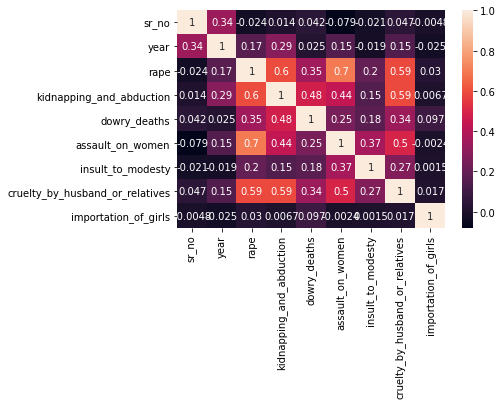

In [68]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,)

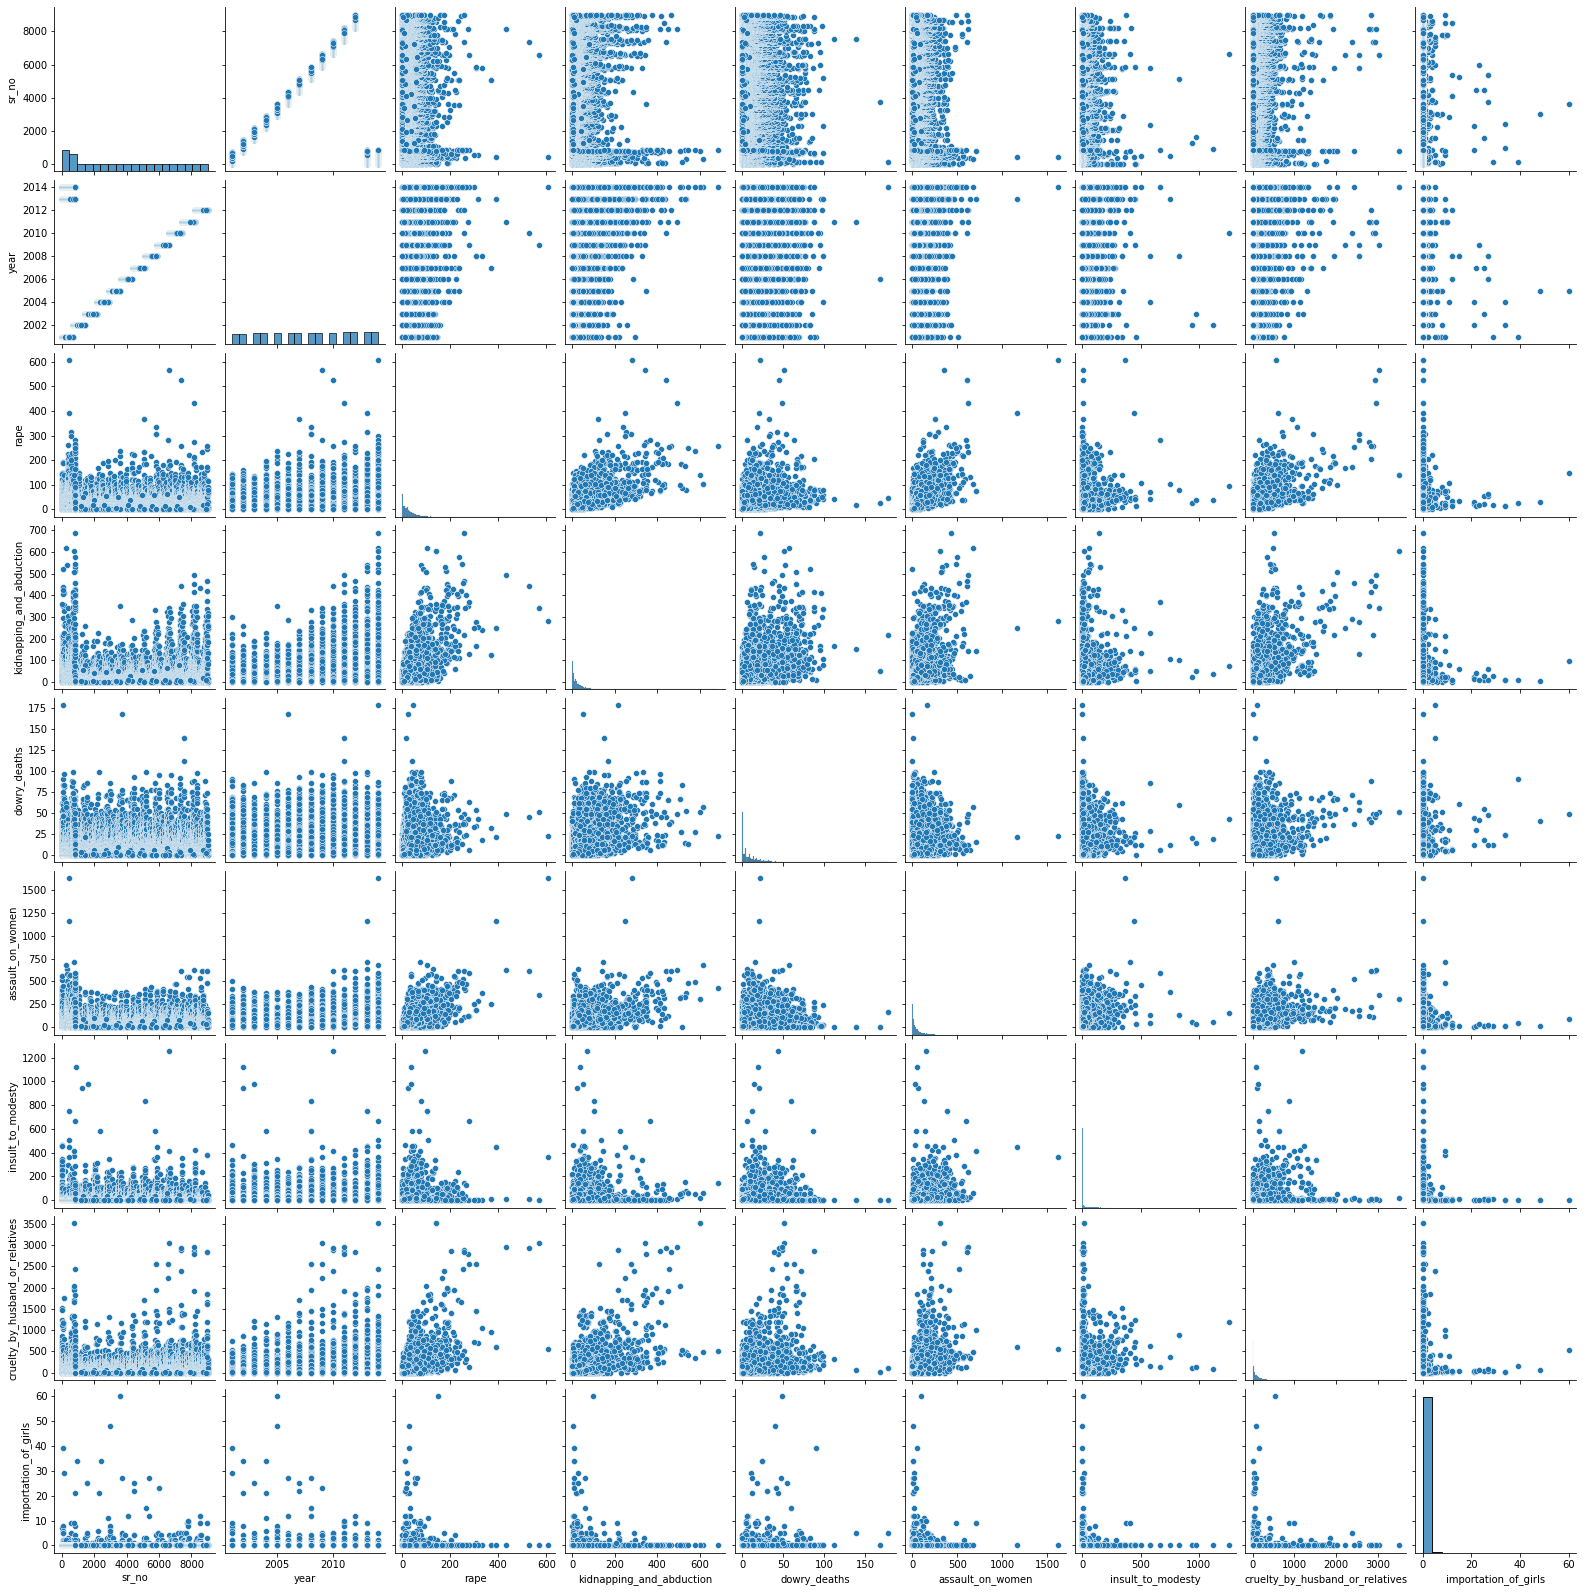

In [69]:
sns.pairplot(women)

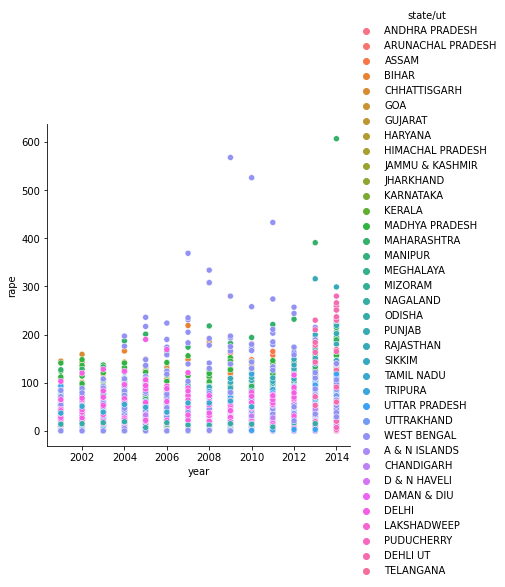

In [70]:
sns.relplot(x='year', y='rape', hue="state/ut", data=women)

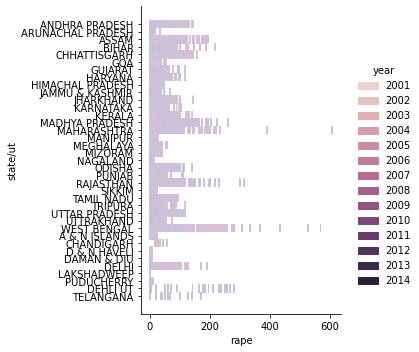

In [71]:
sns.displot(data=women, x="rape", y="state/ut", hue="year")

### Assam:
Taking assam as a case study we can see an increase in 

<AxesSubplot:xlabel='year', ylabel='rape'>

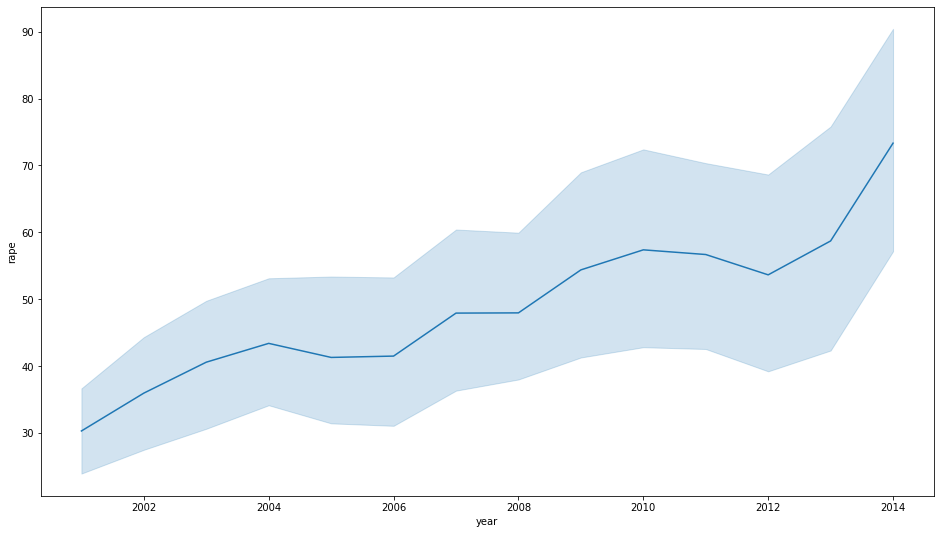

In [83]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=women.loc[df['state/ut']  == "ASSAM"], x="year", y="rape")
